In [39]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

In [40]:
Im_Width = 128
Im_Height = 128

nEpochs = 15

In [41]:
BATCH_SIZE = 32
IMAGE_SIZE = (Im_Height,Im_Width)
VALIDATION_SPLIT = 0.2

In [42]:
train_data_dir = r'D:\Cologne\Sample DataSet 30\Sample\train'
test_data_dir = r'D:\Cologne\Sample DataSet 30\Sample\test'

train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=VALIDATION_SPLIT,
                                                         seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='validation',
                                                         validation_split=VALIDATION_SPLIT,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

Found 120 files belonging to 2 classes.
Using 96 files for training.
Found 120 files belonging to 2 classes.
Using 24 files for validation.
Found 54 files belonging to 2 classes.


In [43]:
class_names = train_data.class_names
class_names

['defective', 'non-defective']

In [44]:
for image_batch,label_batch in train_data.take(1):
    print(image_batch.shape)
    print(label_batch.shape)

(32, 128, 128, 3)
(32,)


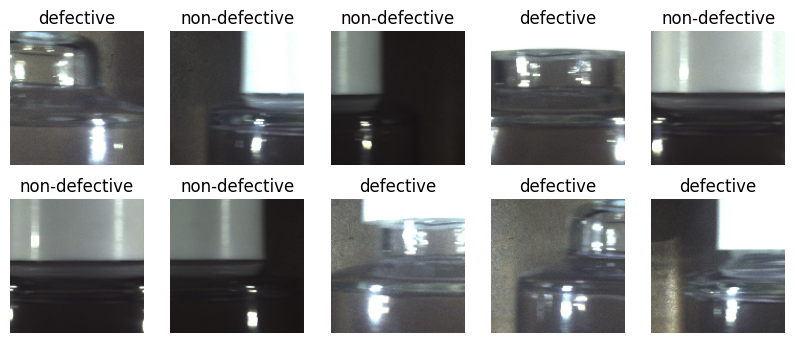

In [45]:
# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

In [46]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [47]:
pretrained_model = tf.keras.applications.xception.Xception(include_top=False,
                                                           input_shape=(Im_Height,Im_Width,3),
                                                           weights="imagenet",
                                                           pooling='max')
for layer in pretrained_model.layers:
        layer.trainable=False

In [48]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(shape=(Im_Height, Im_Width, 3)))

model.add(pretrained_model)

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [49]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │        32,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,894,681 (79.71 MB)

 Trainable params: 33,201 (129.69 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [50]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [51]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=nEpochs,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5065 - loss: 0.6840 - val_accuracy: 0.7500 - val_loss: 0.6640
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 676ms/step - accuracy: 0.7422 - loss: 0.5973 - val_accuracy: 0.6250 - val_loss: 0.6278
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 669ms/step - accuracy: 0.7852 - loss: 0.5100 - val_accuracy: 0.9167 - val_loss: 0.5159
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 656ms/step - accuracy: 0.9010 - loss: 0.4752 - val_accuracy: 0.8750 - val_loss: 0.4751
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 668ms/step - accuracy: 0.9115 - loss: 0.3671 - val_accuracy: 0.8750 - val_loss: 0.4822
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 684ms/step - accuracy: 0.8815 - loss: 0.4162 - val_accuracy: 0.7917 - val_loss: 0.4874
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 711ms/step - accuracy: 0.9180 - loss: 0.3575 - val_accuracy: 0.8750 - val_loss: 0.4610
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 716ms/step - accuracy: 0.9206 - loss: 0.3895 - val_accuracy: 0.9167 - val_loss: 0.

In [52]:
print(f'Total time for training {(end_time-start_time):.3f} seconds')


Total time for training 33.014 seconds


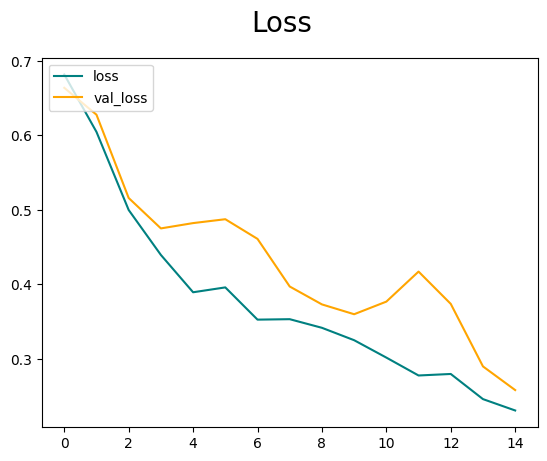

In [53]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

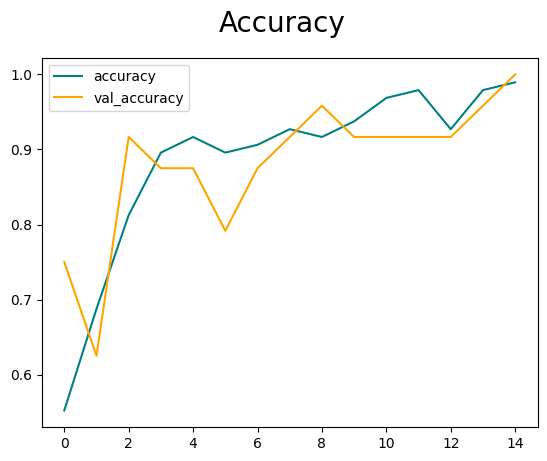

In [54]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [55]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [56]:
precision.result()
recall.result()
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [57]:
model.save('my_model_18.0.keras') # saves the model in keras format
